In [1]:
!pip install pyspellchecker

In [2]:
!pip install wordcloud

In [3]:
#importing libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
# from spellchecker import SpellChecker

In [4]:
#downloading keywords for text filteration
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sanyu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanyu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanyu\AppData\Roaming\nltk_data...


True

In [5]:
#fetching and displaying data
file_path = 'data/tesco.json'

df = pd.read_json(file_path)

display(df.head())

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,matching_rules,possibly_sensitive,extended_tweet,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,scopes
0,2020-10-09 12:46:48,1314547865662951427,1314547865662951424,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]","<a href=""http://twitter.com/download/iphone"" r...",False,1.314314e+18,1.314314e+18,1.232803e+18,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
1,2020-04-21 13:03:54,1252583841824456709,1252583841824456709,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.252584e+18,1.252584e+18,2.719861e+08,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
2,2020-11-30 12:26:19,1333386877974556673,1333386877974556672,WHO WILL WIN?\n@researchlive UK Business Impac...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.333387e+18,1.333387e+18,1.304432e+08,...,[{'tag': None}],0.0,{'full_text': 'WHO WILL WIN? @researchlive UK ...,None,NaN,NaN,None,None,None,NaN
3,2020-04-16 19:07:30,1250863404694175745,1250863404694175745,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]","<a href=""http://twitter.com/download/iphone"" r...",False,1.250857e+18,1.250857e+18,5.974244e+08,...,[{'tag': None}],NaN,None,None,NaN,NaN,None,None,None,NaN
4,2020-12-22 11:34:32,1341346379478740993,1341346379478740992,Any comment @Tesco ? British carrots proudly d...,"[0, 98]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,[{'tag': None}],1.0,None,None,NaN,NaN,None,None,"{'media': [{'id': 1341346375934611461, 'id_str...",NaN


In [6]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'matching_rules', 'possibly_sensitive',
       'extended_tweet', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'extended_entities', 'scopes'],
      dtype='object')

In [7]:
#bifurcation of columns based on analysis requirements
essential_columns = ['created_at', 'text', 'in_reply_to_user_id', 'retweet_count', 'favorite_count']

potentially_relevant = ['display_text_range', 'truncated', 'source', 'quoted_status_id', 'extended_entities', 'possibly_sensitive']

unnecessary_columns = ['id', 'id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'matching_rules', 'scopes'] 

all_unnecessary_columns = unnecessary_columns + [col for col in df.columns if col not in essential_columns + potentially_relevant]

filtered_df = df.drop(all_unnecessary_columns, axis=1)

display(filtered_df)

,created_at,text,display_text_range,source,truncated,in_reply_to_user_id,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,extended_entities
0,2020-10-09 12:46:48,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]","<a href=""http://twitter.com/download/iphone"" r...",False,1.232803e+18,0,0,NaN,NaN,None
1,2020-04-21 13:03:54,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,2.719861e+08,0,0,NaN,NaN,None
2,2020-11-30 12:26:19,WHO WILL WIN?\n@researchlive UK Business Impac...,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,1.304432e+08,2,9,0.0,NaN,None
3,2020-04-16 19:07:30,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]","<a href=""http://twitter.com/download/iphone"" r...",False,5.974244e+08,0,1,NaN,NaN,None
4,2020-12-22 11:34:32,Any comment @Tesco ? British carrots proudly d...,"[0, 98]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,2,6,1.0,NaN,"{'media': [{'id': 1341346375934611461, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...
96697,2020-03-31 10:38:26,"RT @Tesco: From suppliers to colleagues, and e...",None,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,0,0,NaN,NaN,None
96698,2020-12-22 09:54:47,RT @DCBMEP: I would like an explanation too @T...,None,"<a href=""http://twitter.com/download/android"" ...",False,NaN,0,0,NaN,1.341034e+18,None
96699,2020-03-15 17:34:33,@MichelleOwen7 @Tesco Robbing bastards. Can't ...,"[22, 108]","<a href=""http://twitter.com/download/android"" ...",False,3.585861e+07,0,0,NaN,NaN,None
96700,2020-11-12 15:47:46,@fishyberty @ppe_sale @MarcherLord1 @petuniasf...,"[68, 116]","<a href=""http://twitter.com/download/android"" ...",False,1.242717e+18,0,1,NaN,NaN,None


In [8]:
#converting to csv for saving file
filtered_df.to_csv('filtered_df.csv', index=True)

In [9]:
source_counts = filtered_df['source'].value_counts()

display(source_counts)

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>      40638
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    30150
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                 17788
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>        5269
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       632
                                                                                        ...  
<a href="http://jaxinternet.co.uk" rel="nofollow">jaxinternet</a>                           1
<a href="http://getfalcon.pro" rel="nofollow">FalconPro3 BETA</a>                           1
<a href="https://igorstrapko.github.io/blog/" rel="nofollow">bot4coops</a>                  1
<a href="https://www.abdev.co.uk" rel="nofollow">DingDongDelivery00</a>                     1
<a href="https://twitter.com/" rel="nofollow">Culture

In [10]:
#Refining source column
def clean_source(source_str):
    """Simplifies the source column values."""
    if source_str is None:
        return "Others"
    elif "Twitter for iPhone" in source_str:
        return "iPhone"
    elif "Twitter for Android" in source_str:
        return "Android"
    elif "Twitter Web App" in source_str:
        return "Web App"
    else:
        return "Others"

filtered_df['source'] = filtered_df['source'].apply(clean_source)

print(filtered_df['source'].value_counts())

source
iPhone     40638
Android    30150
Web App    17788
Others      8126
Name: count, dtype: int64


In [11]:
display(filtered_df)

,created_at,text,display_text_range,source,truncated,in_reply_to_user_id,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,extended_entities
0,2020-10-09 12:46:48,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]",iPhone,False,1.232803e+18,0,0,NaN,NaN,None
1,2020-04-21 13:03:54,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]",Web App,False,2.719861e+08,0,0,NaN,NaN,None
2,2020-11-30 12:26:19,WHO WILL WIN?\n@researchlive UK Business Impac...,None,Web App,True,1.304432e+08,2,9,0.0,NaN,None
3,2020-04-16 19:07:30,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]",iPhone,False,5.974244e+08,0,1,NaN,NaN,None
4,2020-12-22 11:34:32,Any comment @Tesco ? British carrots proudly d...,"[0, 98]",iPhone,False,NaN,2,6,1.0,NaN,"{'media': [{'id': 1341346375934611461, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...
96697,2020-03-31 10:38:26,"RT @Tesco: From suppliers to colleagues, and e...",None,iPhone,False,NaN,0,0,NaN,NaN,None
96698,2020-12-22 09:54:47,RT @DCBMEP: I would like an explanation too @T...,None,Android,False,NaN,0,0,NaN,1.341034e+18,None
96699,2020-03-15 17:34:33,@MichelleOwen7 @Tesco Robbing bastards. Can't ...,"[22, 108]",Android,False,3.585861e+07,0,0,NaN,NaN,None
96700,2020-11-12 15:47:46,@fishyberty @ppe_sale @MarcherLord1 @petuniasf...,"[68, 116]",Android,False,1.242717e+18,0,1,NaN,NaN,None


In [12]:
#Dropping rows with Null Created_at and Text records
filtered_df = filtered_df.dropna(subset=['created_at', 'text']) 
display(filtered_df)

,created_at,text,display_text_range,source,truncated,in_reply_to_user_id,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,extended_entities
0,2020-10-09 12:46:48,@JourneyStoma @Tesco That’s awesome! I want on...,"[21, 52]",iPhone,False,1.232803e+18,0,0,NaN,NaN,None
1,2020-04-21 13:03:54,"@Tesco Thanks Ben, you're doing a great job ☺️♥️","[7, 48]",Web App,False,2.719861e+08,0,0,NaN,NaN,None
2,2020-11-30 12:26:19,WHO WILL WIN?\n@researchlive UK Business Impac...,None,Web App,True,1.304432e+08,2,9,0.0,NaN,None
3,2020-04-16 19:07:30,@Cilvrnum @Tesco @asda @Ocado Never even seen ...,"[30, 62]",iPhone,False,5.974244e+08,0,1,NaN,NaN,None
4,2020-12-22 11:34:32,Any comment @Tesco ? British carrots proudly d...,"[0, 98]",iPhone,False,NaN,2,6,1.0,NaN,"{'media': [{'id': 1341346375934611461, 'id_str..."
...,...,...,...,...,...,...,...,...,...,...,...
96697,2020-03-31 10:38:26,"RT @Tesco: From suppliers to colleagues, and e...",None,iPhone,False,NaN,0,0,NaN,NaN,None
96698,2020-12-22 09:54:47,RT @DCBMEP: I would like an explanation too @T...,None,Android,False,NaN,0,0,NaN,1.341034e+18,None
96699,2020-03-15 17:34:33,@MichelleOwen7 @Tesco Robbing bastards. Can't ...,"[22, 108]",Android,False,3.585861e+07,0,0,NaN,NaN,None
96700,2020-11-12 15:47:46,@fishyberty @ppe_sale @MarcherLord1 @petuniasf...,"[68, 116]",Android,False,1.242717e+18,0,1,NaN,NaN,None


In [13]:
# Handling Null Values
filtered_df['in_reply_to_user_id'] = filtered_df['in_reply_to_user_id'].fillna('Unknown')
filtered_df['retweet_count'] = filtered_df['retweet_count'].fillna(0)
filtered_df['favorite_count'] = filtered_df['favorite_count'].fillna(0)
filtered_df['possibly_sensitive'] = filtered_df['possibly_sensitive'].fillna(0)
filtered_df['quoted_status_id'] = filtered_df['quoted_status_id'].fillna('Unknown')
filtered_df['extended_entities'] = filtered_df['extended_entities'].fillna('Unknown')

In [14]:
# Validation Code to check null values in a specific column
null_rows = filtered_df[filtered_df['extended_entities'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [created_at, text, display_text_range, source, truncated, in_reply_to_user_id, retweet_count, favorite_count, possibly_sensitive, quoted_status_id, extended_entities]
Index: []


In [15]:
# To Clean the text in Tweets
def clean_text(tweet):

    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'tesco', 'rt', 'hes', 'just', 'oh', 'a', 'an', 'the'} # Example list
    
    tweet = tweet.lower()
    tweet = re.sub(r'https?://\S+', '', tweet) 
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet) 
    tweet = re.sub(r"[^\w\s]", '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    filtered_words = [word for word in words if word not in (stop_words | custom_stopwords)] 
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words] 

    return ' '.join(lemmatized_words) 

In [33]:
# using SentimentIntensityAnalyzer to find compound score and sentiment of tweets
analyzer = SentimentIntensityAnalyzer()

filtered_df['compound_score'] = filtered_df['text'].apply(lambda x: analyzer.polarity_scores(clean_text(x))['compound'])

filtered_df['sentiment'] = filtered_df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))
print(filtered_df.head())

           created_at                                               text  \
0 2020-10-09 12:46:48  @JourneyStoma @Tesco That’s awesome! I want on...   
1 2020-04-21 13:03:54   @Tesco Thanks Ben, you're doing a great job ☺️♥️   
2 2020-11-30 12:26:19  WHO WILL WIN?\n@researchlive UK Business Impac...   
3 2020-04-16 19:07:30  @Cilvrnum @Tesco @asda @Ocado Never even seen ...   
4 2020-12-22 11:34:32  Any comment @Tesco ? British carrots proudly d...   

  display_text_range   source  truncated    in_reply_to_user_id  \
0           [21, 52]   iPhone      False  1232802965000000000.0   
1            [7, 48]  Web App      False            271986064.0   
2               None  Web App       True            130443167.0   
3           [30, 62]   iPhone      False            597424425.0   
4            [0, 98]   iPhone      False                Unknown   

   retweet_count  favorite_count  possibly_sensitive quoted_status_id  \
0              0               0                 0.0          Unkno

In [17]:
print(filtered_df['sentiment'].value_counts())

print("Average compound sentiment score:", filtered_df['compound_score'].mean())


sentiment
positive    46481
neutral     32229
negative    17992
Name: count, dtype: int64
Average compound sentiment score: 0.15899780252735213


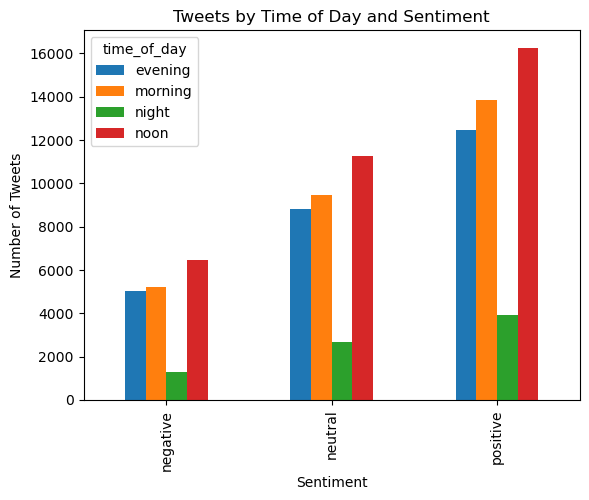

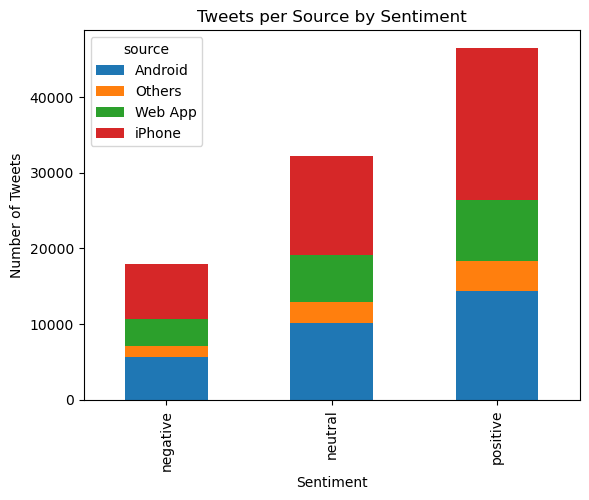

In [37]:
import pandas as pd

def categorize_hour(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'noon'
    elif 18 <= hour <= 22:
        return 'evening'
    else:  # 23 - 5 
        return 'night'

filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'])
filtered_df['hour'] = filtered_df['created_at'].dt.hour
filtered_df['time_of_day'] = filtered_df['hour'].apply(categorize_hour)

sentiment_by_time_of_day = filtered_df.groupby(['sentiment', 'time_of_day'])['text'].count().unstack().fillna(0)
sentiment_by_time_of_day.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Time of Day and Sentiment')
plt.show()


# # Most Used Source
sentiment_by_source = filtered_df.groupby(['sentiment', 'source'])['text'].count().unstack().fillna(0)
sentiment_by_source.plot(kind='bar', stacked=True)  # Stacked for easier comparison
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Tweets per Source by Sentiment')

# plt.legend(bbox_to_anchor=(1.05, 5), loc='upper left')  # Adjust coordinates as needed

plt.show()

sentiment
positive    147
neutral      81
negative     57
Name: count, dtype: int64


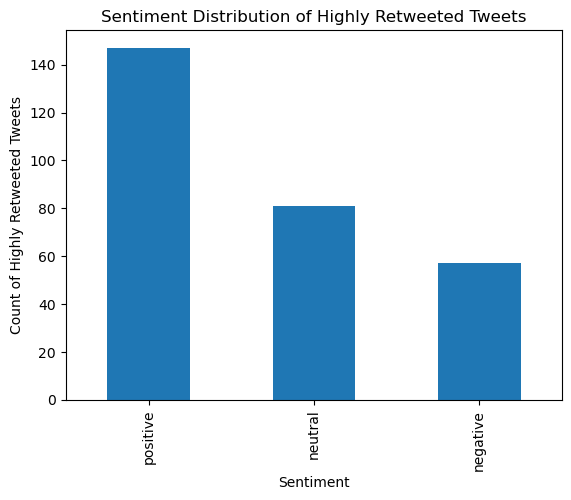

In [19]:
most_retweeted = filtered_df.sort_values('retweet_count', ascending=False)

retweet_threshold = 10 # Adjustable

highly_retweeted_df = most_retweeted[most_retweeted['retweet_count'] >= retweet_threshold]

highly_retweeted_sentiment = highly_retweeted_df['sentiment'].value_counts().sort_values(ascending=False)

print(highly_retweeted_sentiment)

highly_retweeted_sentiment.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count of Highly Retweeted Tweets')
plt.title('Sentiment Distribution of Highly Retweeted Tweets')
plt.show()


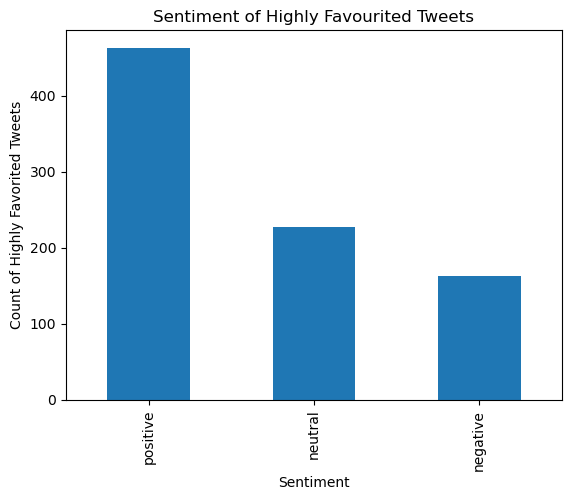

In [38]:
most_favorited = filtered_df.sort_values('favorite_count', ascending=False)

favorite_threshold = 20  # Adjust as needed
highly_favorited_df = most_favorited[most_favorited['favorite_count'] >= favorite_threshold]

highly_favorited_sentiment = highly_favorited_df['sentiment'].value_counts().sort_values(ascending=False)
highly_favorited_sentiment.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count of Highly Favorited Tweets')
plt.title('Sentiment of Highly Favourited Tweets')
plt.show()


In [21]:
sensitive_df = filtered_df[filtered_df['possibly_sensitive'] == 1]
sensitive_sentiment = sensitive_df['sentiment'].value_counts()
print(sensitive_sentiment)

sentiment
neutral     111
positive    105
negative     59
Name: count, dtype: int64


In [22]:
custom_stopwords = {'tesco', 'rt', 'hes', 'ive', 'oh', 'a', 'an', 'the'}

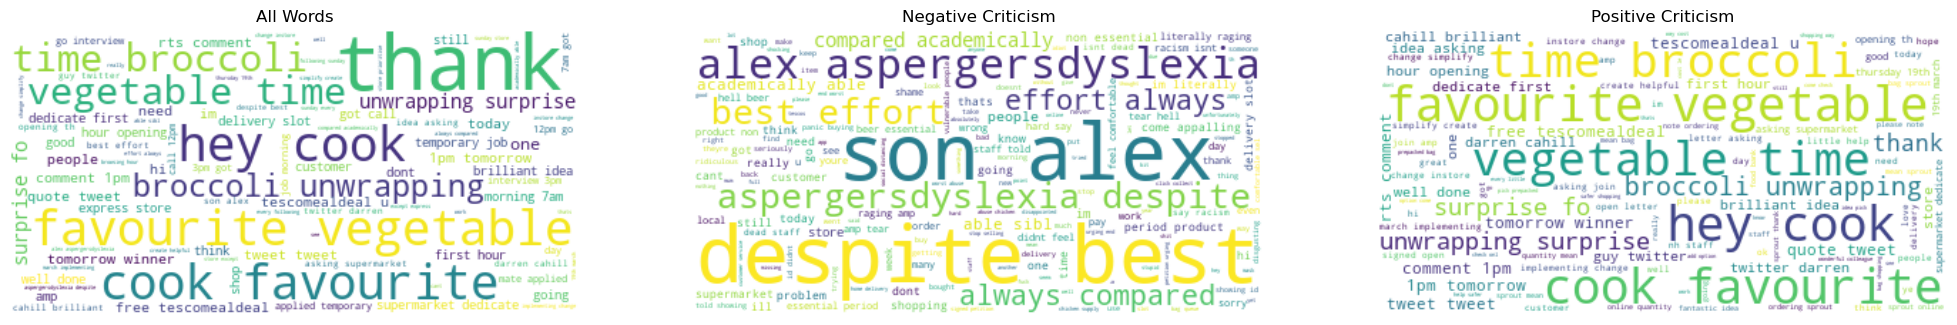

In [23]:
stop_words = set(stopwords.words('english'))

def important_words(tweet, custom_stopwords=custom_stopwords):
    cleaned_tweet = clean_text(tweet)
    words = cleaned_tweet.split()
    filtered_words = [word for word in words if word not in (stop_words | custom_stopwords)]
    return ' '.join(filtered_words)


# Get all important words
all_words = ' '.join(important_words(text, custom_stopwords=custom_stopwords) for text in filtered_df['text'])
# print(type(all_words))   # Should be <class 'str'>
# print(all_words[:50])   # Should show a part of the string
custom_colors = ["#FFFACD", "#C2F0F0", "#F0E68C", "#90EE90", "#ADD8E6"]
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(all_words)
# wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', colormap='plasma').generate(all_words)
# plt.imshow(wordcloud, interpolation='bilinear')

negative_words = ' '.join(important_words(text, custom_stopwords=custom_stopwords) for text in filtered_df[filtered_df['sentiment'] == 'negative']['text'])
negative_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(negative_words)

positive_words = ' '.join(important_words(text, custom_stopwords=custom_stopwords) for text in filtered_df[filtered_df['sentiment'] == 'positive']['text'])
positive_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(positive_words)


plt.figure(figsize=(25, 15)) 
# plt.figure(figsize=(25,15))
plt.subplot(1,3,1) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('All Words')
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Criticism')
plt.axis("off")

plt.subplot(1,3,3) 
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Criticism')
plt.axis("off")

plt.show()

wordcloud.to_file("all_words.png")  
negative_wordcloud.to_file("negative_criticism.png")
positive_wordcloud.to_file("positive_criticism.png")

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

In [25]:
filtered_df['cleaned_text'] = filtered_df['text'].apply(clean_text)

In [26]:
vectorizer = CountVectorizer(max_features=1000,
                             stop_words='english')
doc_term_matrix = vectorizer.fit_transform(filtered_df['cleaned_text'])

In [27]:
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_model.fit(doc_term_matrix) 

LatentDirichletAllocation(random_state=0)

In [28]:
def display_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx + 1)) 
        print([(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

display_topics(lda_model, vectorizer) 


Topic 1:
[('dont', 2597.8589619189274), ('amp', 2309.0148157134136), ('help', 2025.3526131176702), ('open', 1389.099962465183), ('asking', 1104.5618824707974), ('letter', 884.0999925730747), ('join', 856.9352309088048), ('signed', 821.9257153894691), ('little', 733.2291841885678), ('im', 712.9083015229603)]
Topic 2:
[('know', 1748.2759924845404), ('need', 1428.2937626990276), ('think', 1295.640356919373), ('big', 933.9647035211495), ('good', 930.5858924594852), ('day', 850.7416585294915), ('shopping', 831.4893412691978), ('youre', 825.2362241801163), ('really', 793.70297299046), ('help', 788.1958240886634)]
Topic 3:
[('like', 3389.092272155889), ('tweet', 2685.0999922551055), ('free', 2115.099964038251), ('tomorrow', 1703.0999746232712), ('comment', 1360.0999929562038), ('1pm', 1217.0999984321893), ('tescomealdeal', 1216.0999980590655), ('winner', 1210.0999970956047), ('quote', 1184.0999990438586), ('rts', 1158.099999843175)]
Topic 4:
[('thank', 1991.88144440164), ('idea', 1553.1555853

In [29]:
def get_sentiment_per_topic(model, doc_term_matrix, df):
    doc_topic_dists = model.transform(doc_term_matrix)

    df['topic'] = doc_topic_dists.argmax(axis=1) + 1
    return df.groupby('topic')['sentiment'].value_counts().unstack().fillna(0)

sentiment_per_topic = get_sentiment_per_topic(lda_model, doc_term_matrix, filtered_df.copy())
print(sentiment_per_topic)

sentiment  negative  neutral  positive
topic                                 
1              1729     9745      4277
2              3489     4470      7571
3               402      385      2847
4               394     1672      3680
5               977     1390      2182
6              1548     2424      6843
7              4552     4383      5034
8              1612     2337      5147
9              3117     4291      5336
10              172     1132      3564


In [30]:
def generate_sentiment_summary(lda_model, doc_term_matrix, df, vectorizer):

    for topic_num, sentiment_dist in sentiment_per_topic.iterrows():
        dominant_sentiment = sentiment_dist.idxmax() 
        top_words = ", ".join(word for word, weight in top_words_per_topic[topic_num]) 
        summary = f"Topic {topic_num} is discussed frequently. Sentiment towards this topic is predominantly {dominant_sentiment}. Example keywords include: {top_words}."
        print(summary) 

In [31]:
def generate_sentiment_summary(lda_model, doc_term_matrix, df, vectorizer):
    # Get sentiment per topic
    sentiment_per_topic = get_sentiment_per_topic(lda_model, doc_term_matrix, df.copy())

    # Top words per topic
    top_words_per_topic = {}
    for idx, topic in enumerate(lda_model.components_):
        top_words_per_topic[idx + 1] = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-10 - 1:-1]]

    # Summary
    for topic_num, sentiment_dist in sentiment_per_topic.iterrows():
        dominant_sentiment = sentiment_dist.idxmax() 
        top_words = ", ".join(word for word, weight in top_words_per_topic[topic_num]) 
        summary = f"Sentiment for Topic {topic_num} is {dominant_sentiment}. Example keywords include: {top_words}."
        print(summary) 

generate_sentiment_summary(lda_model, doc_term_matrix, filtered_df, vectorizer)


Sentiment for Topic 1 is neutral. Example keywords include: dont, amp, help, open, asking, letter, join, signed, little, im.
Sentiment for Topic 2 is positive. Example keywords include: know, need, think, big, good, day, shopping, youre, really, help.
Sentiment for Topic 3 is positive. Example keywords include: like, tweet, free, tomorrow, comment, 1pm, tescomealdeal, winner, quote, rts.
Sentiment for Topic 4 is positive. Example keywords include: thank, idea, supermarket, th, guy, sprout, hour, mean, brilliant, ive.
Sentiment for Topic 5 is positive. Example keywords include: got, change, job, able, best, morning, mate, alex, son, despite.
Sentiment for Topic 6 is positive. Example keywords include: food, staff, want, mask, thank, shop, people, work, support, store.
Sentiment for Topic 7 is positive. Example keywords include: delivery, people, slot, come, vulnerable, week, home, today, elderly, look.
Sentiment for Topic 8 is positive. Example keywords include: nh, customer, buy, im, s